# Inception in RAIL - Demo

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import rail
import qp
from rail.core.data import TableHandle
from rail.core.stage import RailStage

from rail_inception import Inform_Inception, Inception

In [2]:
DS = RailStage.data_store
DS.__class__.allow_overwrite = True

### Preparation

To be understood by the estimator, the input data has to be reorganised as a 2d-array, so for each galaxy the first value will be the redshift and all the following is the flatten image.

In [3]:
img = np.load('/global/cfs/cdirs/lsst/groups/PZ/valentin_image_data_temp/img_30k.npy')
z = np.load('/global/cfs/cdirs/lsst/groups/PZ/valentin_image_data_temp/z_30k.npy')

In [4]:
img = img.reshape((-1, 64*64*5))
img.shape

(30000, 20480)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


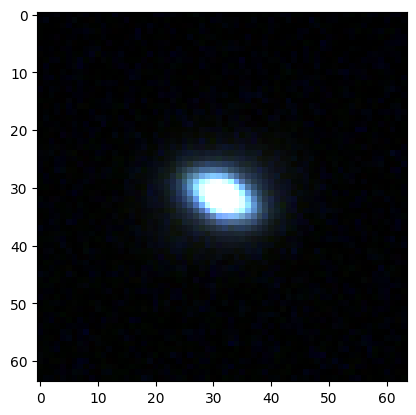

In [5]:
# Check the unflatten step
img_0 = img[1].reshape((64, 64, 5))
plt.imshow(img_0[..., 2:5]);

In [6]:
z = z.reshape((-1,1))
train_data = np.concatenate((z[:20000], img[:20000]), axis = 1)
test_data = np.concatenate((z[20000:], img[20000:]), axis = 1)

train_data.shape

(20000, 20481)

In [7]:
training = DS.add_data("training", train_data, TableHandle)
testing = DS.add_data("testing", test_data, TableHandle)

### Training

In [8]:
inc_dict = dict(trainfrac=0.75,
                epoch=25,
                hdf5_groupname='photometry')

In [9]:
Inform = Inform_Inception.make_stage(name='Inform_Inception', model='demo_inc.pkl', **inc_dict)

Split into 15000 training and 5000 validation samples
Model training:
Epoch 1/25
234/234 [==============================] - 12s 35ms/step - loss: 0.0690 - val_loss: 0.0019 - lr: 0.0010
Epoch 2/25
234/234 [==============================] - 8s 32ms/step - loss: 0.0015 - val_loss: 0.0013 - lr: 9.0000e-04
Epoch 3/25
234/234 [==============================] - 8s 32ms/step - loss: 0.0014 - val_loss: 0.0012 - lr: 8.1000e-04
Epoch 4/25
234/234 [==============================] - 7s 32ms/step - loss: 0.0013 - val_loss: 0.0012 - lr: 7.2900e-04
Epoch 5/25
234/234 [==============================] - 7s 32ms/step - loss: 0.0011 - val_loss: 0.0011 - lr: 6.5610e-04
Epoch 6/25
234/234 [==============================] - 7s 32ms/step - loss: 9.6286e-04 - val_loss: 9.3347e-04 - lr: 5.9049e-04
Epoch 7/25
234/234 [==============================] - 8s 32ms/step - loss: 9.0559e-04 - val_loss: 0.0011 - lr: 5.3144e-04
Epoch 8/25
234/234 [==============================] - 7s 32ms/step - loss: 8.2522e-04 - val_los

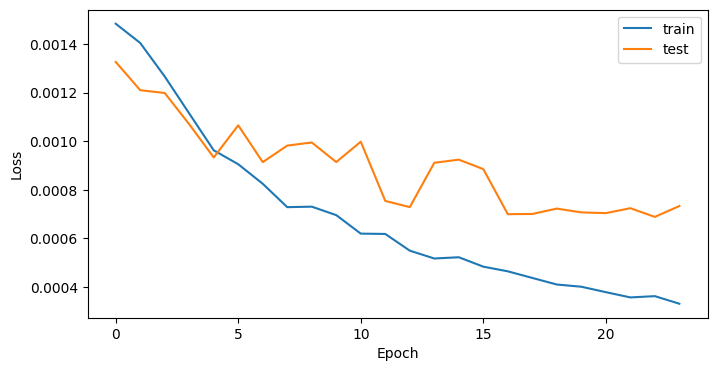

Inserting handle into data store.  model_Inform_Inception: inprogress_demo_inc.pkl, Inform_Inception


INFO:tensorflow:Assets written to: ram://426965bd-340c-4d78-9340-d285d7dfb09f/assets


INFO:tensorflow:Assets written to: ram://426965bd-340c-4d78-9340-d285d7dfb09f/assets


In [10]:
Inform.inform(training)

### Results

In [11]:
Inception_model = Inception.make_stage(name='Inception', hdf5_groupname='photometry',
                                       model=Inform.get_handle('model'))

313/313 [==============================] - 2s 6ms/step
Prediction bias: 0.0008


<IPython.core.display.Latex object>

Outlier fraction: 3.37%


KeyError: 'Inception failed to get data by handle output_Inception, associated to output'

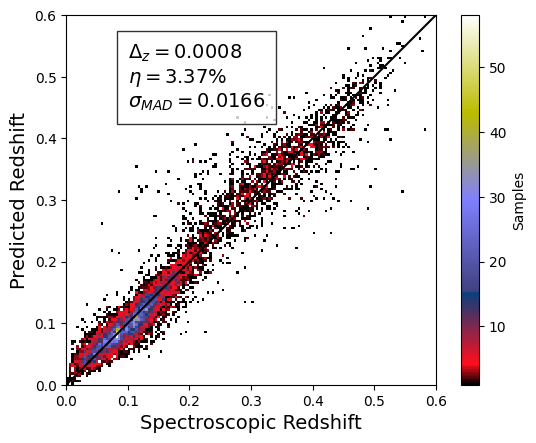

In [12]:
results = Inception_model.estimate(testing)